In [1]:


#importamos las librerias de tensorflow  y las de keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#para saber las version del tensoflow usada
print(tf.__version__)

2.3.1


In [2]:
#Precargamos los datos en keras
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

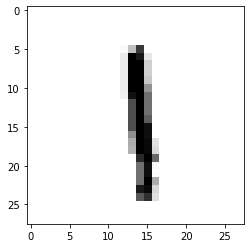

In [3]:
#importamos el matploplib para la imagen bidimensional con los datos
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [4]:
print(y_train[8])

1


In [5]:
print(x_train.ndim)

3


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_train.dtype)

uint8


In [8]:
my_slice = x_train [1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [9]:
my_slice = x_train [1:100,0:28, 0:28]
print(my_slice.shape)

(99, 28, 28)


In [10]:
my_slice = x_train [:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [11]:
my_slice = x_train [:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


Se procesan los datos de la red neuronal despues de haberlos entrenado

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [13]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
#importamos categorical para generar la matriz de datos
from tensorflow.keras.utils import to_categorical

In [16]:
print(y_test[0])

7


In [17]:
print(y_train[0])

5


In [18]:
print(y_train.shape)

(60000,)


In [19]:
print(x_test.shape)

(10000, 784)


In [20]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [21]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
print(y_train.shape)

(60000, 10)


In [23]:
print(y_test.shape)

(10000, 10)


Definimos el modelo

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se configura el proceso de aprendizaje

In [26]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

Se entrena este nuevo modelo

In [27]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 965us/step - loss: 1.9001 - accuracy: 0.4929
Epoch 2/5
1875/1875 [==============================] - 2s 890us/step - loss: 1.2692 - accuracy: 0.7517
Epoch 3/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.9456 - accuracy: 0.8056
Epoch 4/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.7697 - accuracy: 0.8361
Epoch 5/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.6601 - accuracy: 0.8547


Se evalua el nuevo modelo

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 796us/step - loss: 0.6010 - accuracy: 0.8654


In [29]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8654000163078308


In [30]:
# se ve la matriz de confusion
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

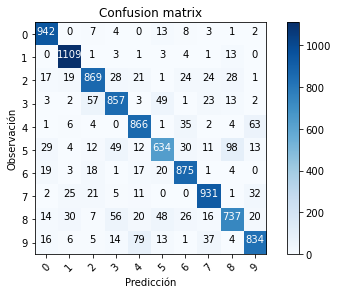

In [31]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se generan las predicciones

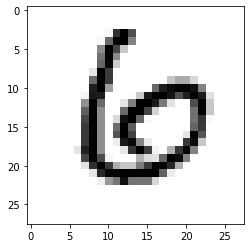

In [32]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [33]:
predictions = model.predict(x_test)

In [34]:
np.argmax(predictions[11])

6

In [35]:
print(predictions[11])

[0.1244377  0.03542339 0.2218645  0.01922962 0.0770406  0.04285747
 0.35751644 0.00474105 0.10566974 0.01121948]


In [36]:
np.sum(predictions[11])

1.0

# Ejercicio Ropa

In [37]:
## Obtenemos los datos fashion_mnist


In [41]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [43]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [44]:
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [45]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

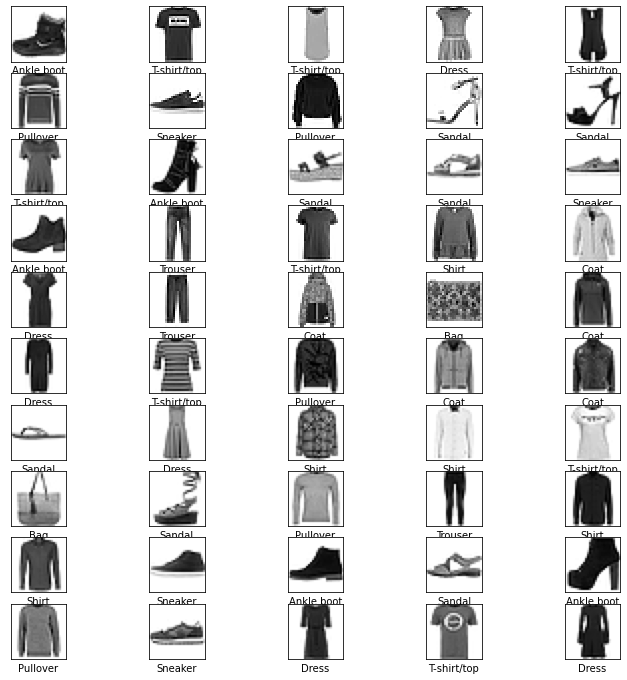

In [46]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [47]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.7366 - accuracy: 0.7704
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6874 - accuracy: 0.7841
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6491 - accuracy: 0.7953
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6190 - accuracy: 0.8018
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5949 - accuracy: 0.8082: 0s - l


In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 0s 765us/step - loss: 0.6060 - accuracy: 0.7992


In [55]:
print('Test accuracy:', test_acc)

Test accuracy: 0.7991999983787537


In [56]:
predictions = model.predict(test_images)

In [57]:
predictions[5]

array([3.1113708e-02, 9.0854472e-01, 3.6943669e-03, 1.0114537e-02,
       2.2750434e-02, 1.7957501e-03, 1.6597902e-02, 3.5875736e-04,
       1.4510425e-03, 3.5788529e-03], dtype=float32)

In [58]:
np.argmax(predictions[5])

1

In [59]:
test_labels[5]

1

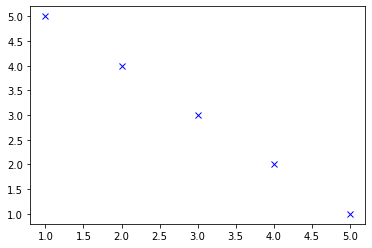

In [64]:
from matplotlib import *
import matplotlib.pyplot
matplotlib.pyplot.plot([1,2,3,4,5],[5,4,3,2,1],"bx")
matplotlib.pyplot.show()

In [67]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

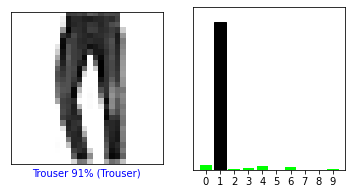

In [68]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

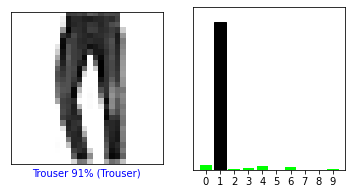

In [69]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

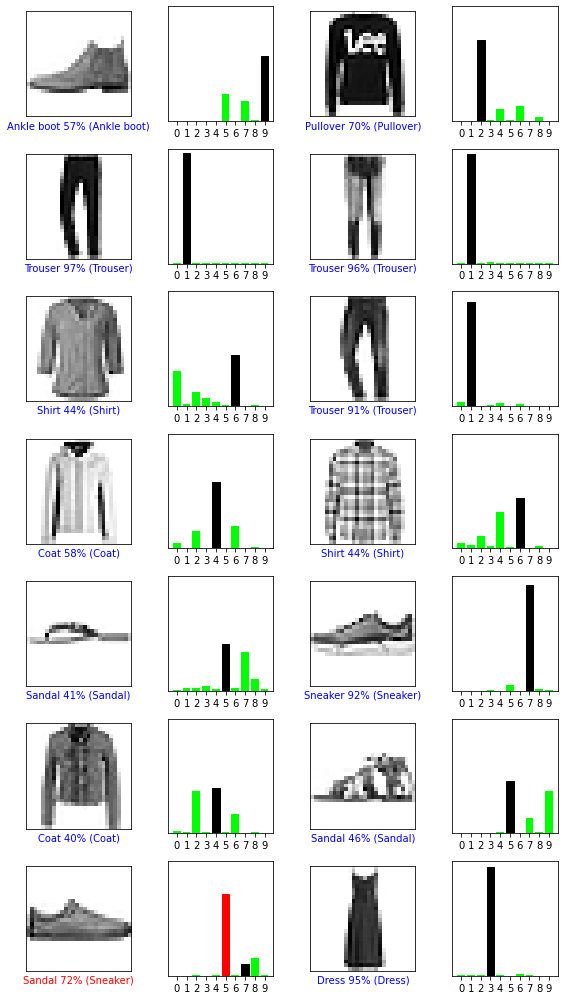

In [70]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [65]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 2s 987us/step - loss: 1.0160 - accuracy: 0.7375
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5502 - accuracy: 0.8329
Epoch 3/5
1875/1875 [==============================] - 2s 991us/step - loss: 0.4652 - accuracy: 0.8466
Epoch 4/5
1875/1875 [==============================] - 2s 992us/step - loss: 0.4318 - accuracy: 0.8534
Epoch 5/5
313/313 [==============================] - 0s 748us/step - loss: 0.4547 - accuracy: 0.8443

Test accuracy: 0.8442999720573425
